># 활성화 함수

- 신경망의 성능을 높이는 방법은 유닛 수를 늘리는 것도 있지만, 활성화 함수를 통해 신경망의 표현력을 높이는 방법도 있음

___
>## 활성화 함수의 등장

- 신경망은 일반적으로 유닛의 출력을 (0,1)로 하기 보다는 함수를 적용한 뒤 출력
- 가장 보편적인 예로 시그모이드 함수가 있고, (0,1) 대신 0~1 범위의 값을 출력하게 됨
- 시그모이드 함수를 활성화 함수로 사용 시 식별 경계가 변하는 모습은 아래처럼 확인 가능

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_boundary(levels):
    # 0.05간격으로 그리드 점 생성하기
    xx, yy = np.meshgrid(np.arange(-5, 5, 0.05),
                         np.arange(-5, 5, 0.05))
    # 생성한 그리드의 점을 하나하나 추론하기
    Z = predict(np.c_[xx.ravel(), yy.ravel()])

    # 그래프를 그릴 수 있게 2차원 배열로 변환하기
    Z = Z.reshape(xx.shape)

    # 식별 경계를 기준으로 영역을 색칠하기
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.5)
    plt.colorbar(ticks=[0, 0.5, 1])

    # 식별 경계 그리기
    plt.contour(xx, yy, Z, colors='k', levels=levels, linestyles=['-'])
    #plt.contour(xx, yy, Z, colors='k', levels=0, linestyles=['-'])

In [3]:
def sigmoid(score):
    return 1. / (1. + np.exp(-score))

def predict(X_dataset):
    pred = []
    for X in X_dataset:
        a11_out = sigmoid(np.dot(w11, X) + b11)
        a12_out = sigmoid(np.dot(w12, X) + b12)
        a21_out = sigmoid(np.dot(w21, [a11_out, a12_out]) + b21)
        pred.append(a21_out)
    return np.array(pred, dtype = np.float32)

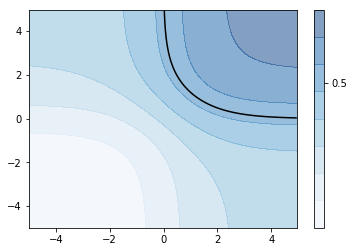

In [7]:
w11 = [1., 0.]
w12 = [0., 1.]
w21 = [1., 1.]
b11 = 0.
b12 = 0.
b21 = -1.5

plot_boundary([0.5])

- 직각이었던 식별경계가 곡선으로 변경된 것은 물론, (0, 1) 영역도 부드럽게 변경됨

___

>## 다양한 활성화 함수

- 역사적으로 신경망이 뇌의 신경세포 기능을 모방하는데서 시작하다보니, (0, 1)로 분류 혹은 시그모이드 함수가 자주 사용되었음
- 하지만 최근에는 활성화 함수가 원점을 지나는 (-1 ~ 1) **쌍곡탄젠트 함수<sub>Hyperbolic Tangent: tanh<sub/>**나, **ReLU함수<sub>Rectified Linear Unit Function<sub/>**도 빈번하게 사용됨

(0, 1)

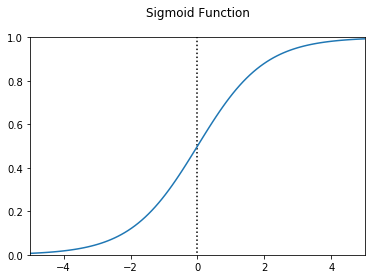

In [12]:
X = np.linspace(-5, 5, 100)

fx = 1/(1 + np.exp(-X))

plt.plot(X, fx)
plt.title('Sigmoid Function\n')
#plt.hlines(y = 0, xmin = -5, xmax =5, linestyles=':')
plt.vlines(x = 0, ymin = -5, ymax =5, linestyles=':')
plt.xlim(-5, 5)
plt.ylim(round(min(fx)), round(max(fx)))

(-1.0, 1.0)

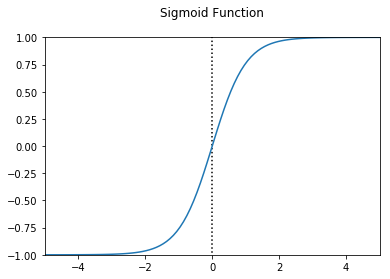

In [18]:
fx = np.tanh(X)

plt.plot(X, fx)
plt.title('Tangent Function\n')
plt.hlines(y = 0, xmin = -5, xmax =5, linestyles=':')
plt.vlines(x = 0, ymin = -5, ymax =5, linestyles=':')
plt.xlim(-5, 5)
plt.ylim(round(min(fx)), round(max(fx)))

In [23]:
xs = []
for x in X:
    x if x>0 else 0
    xs.append(x)
xs

[-5.0,
 -4.898989898989899,
 -4.797979797979798,
 -4.696969696969697,
 -4.595959595959596,
 -4.494949494949495,
 -4.393939393939394,
 -4.292929292929293,
 -4.191919191919192,
 -4.090909090909091,
 -3.9898989898989896,
 -3.888888888888889,
 -3.787878787878788,
 -3.686868686868687,
 -3.5858585858585856,
 -3.484848484848485,
 -3.383838383838384,
 -3.282828282828283,
 -3.1818181818181817,
 -3.080808080808081,
 -2.9797979797979797,
 -2.878787878787879,
 -2.7777777777777777,
 -2.676767676767677,
 -2.5757575757575757,
 -2.474747474747475,
 -2.3737373737373737,
 -2.272727272727273,
 -2.1717171717171717,
 -2.070707070707071,
 -1.9696969696969697,
 -1.868686868686869,
 -1.7676767676767677,
 -1.6666666666666665,
 -1.5656565656565657,
 -1.4646464646464645,
 -1.3636363636363638,
 -1.2626262626262625,
 -1.1616161616161618,
 -1.0606060606060606,
 -0.9595959595959593,
 -0.858585858585859,
 -0.7575757575757578,
 -0.6565656565656566,
 -0.5555555555555554,
 -0.45454545454545503,
 -0.3535353535353538,
 -0

In [22]:
X

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96